# Análise rendimento acadêmico de alunos PAPFE - Graduação

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

## Manipulação dos dados e configurações

In [ ]:
# Código para salvar cada aba da planilha original como um csv separado
#excel_file = pd.ExcelFile('graduacao.xlsx')

# Iterar sobre as abas
#for sheet_name in excel_file.sheet_names:
    # Ler cada aba
 #   df = pd.read_excel(excel_file, sheet_name)


  #  df.to_csv(f'{sheet_name}.csv', index=False)

In [ ]:
df1 = pd.read_csv('1Sem.csv')
df2 = pd.read_csv('2Sem.csv')

In [ ]:
def qui_quadrado(var1, var2):

  chi = pd.crosstab(var1, var2) # tabela de contingência
  chi_scores = chi2_contingency(chi) # cálculo de qui-quadrado

  scores = pd.Series(chi_scores[0]) # valor da estatística
  pvalues = pd.Series(chi_scores[1]) # p-valor

  # Criar dataframe com resultado
  d = {'Qui2': scores, 'p-Valor': pvalues}
  chi_squared = pd.DataFrame(d)

  # Renomear
  d = {0: var2.name}
  chi_squared = chi_squared.rename(d)

  return chi_squared

## Comparação entre colunas No USP para verificar se são condizentes

O método .equals() é um método fornecido pelo pandas que permite verificar se duas séries ou DataFrames são iguais. Ele retorna True se os elementos de duas séries ou DataFrames forem iguais e tiverem os mesmos rótulos de índice. Caso contrário, retorna False.

In [ ]:

# Resetar os índices dos DataFrames
df1_reset = df1.reset_index(drop=True)
df2_reset = df2.reset_index(drop=True)

# Extrair as colunas desejadas
coluna_df1 = df1_reset['NUSP']
coluna_df2 = df2_reset['NUSP']

# Verificar se as colunas são iguais
if coluna_df1.tolist() == coluna_df2.tolist():
    print("As colunas são iguais.")
else:
    print("As colunas não são iguais.")

    # Encontrar os valores diferentes
    diff_indices = [i for i in range(len(coluna_df1)) if coluna_df1[i] != coluna_df2[i]]
    diff_values_df1 = [coluna_df1[i] for i in diff_indices]
    diff_values_df2 = [coluna_df2[i] for i in diff_indices]
    print("Diferença encontrada nos índices:", diff_indices)
    print("Valores diferentes no df1:", diff_values_df1)
    print("Valores diferentes no df2:", diff_values_df2)


As colunas não são iguais.


Diferença encontrada nos índices: [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 2

Fazendo uma análise visual (comparando valores na planilha), acredito que a diferença é decorrente de alterações nas posições dos NUSP, quando há inserção ou exclusão de algum aluno de um semestre para o outro.

## Análises por Instituto

### Tabela de percentuais comparando 1 e 2 semestre

In [ ]:
# Corrigindo respostas que indicam mais de um instituto

dicio_institutos = {'Física Méd - IF e FM': 'IF',
                    'Inter IFSC/IQSC/ICMC': 'IFSC',
                    'EESC e ICMC': 'EESC'
                    }
df1['Unidade'] = df1['Unidade'].replace(dicio_institutos)
df2['Unidade'] = df2['Unidade'].replace(dicio_institutos)



In [ ]:
# valor total por unidade
dic_total = df1['Unidade'].value_counts().to_dict()

# Filtrar aprovação em ao menos 20% créditos igual a 'S'
df_filtered_20 = df1[df1['Aprovação em ao menos 20% créditos'] == 'S']
df_filtered_50 = df1[df1['Aprovação em ao menos 50% disciplinas'] == 'S']

# tabela de frequência cruzada para contar o número de 'S' por unidade
dic_unidade_20 = pd.crosstab(index=df_filtered_20['Unidade'], columns='Aprovação em ao menos 20% créditos')
dic_unidade_50 = pd.crosstab(index=df_filtered_50['Unidade'], columns='Aprovação em ao menos 50% disciplinas')

informacoes = []

# itera sobre os resultados da crosstab para 20% de créditos
for unidade, valor_especifico in dic_unidade_20.iterrows():
    total = dic_total.get(unidade, 0)  # Se não houver valor total, assume 0
    porcentagem_20 = (valor_especifico['Aprovação em ao menos 20% créditos'] / total) * 100 if total != 0 else 0
    # 50% de disciplinas na unidade
    if unidade in dic_unidade_50.index:
        aprovacao_50 = dic_unidade_50.loc[unidade].iloc[0]
        porcentagem_50 = (aprovacao_50 / total) * 100 if total != 0 else 0

    informacoes.append({'Unidade': unidade, 'Total': total, '20% créditos': valor_especifico['Aprovação em ao menos 20% créditos'], 'Porcentagem de aprovados em ao menos 20% créditos': porcentagem_20, '50% disciplinas': aprovacao_50, 'Porcentagem de aprovados em ao menos 50% disciplinas': porcentagem_50})

df_informacoes = pd.DataFrame(informacoes)
#df_informacoes.to_csv('informacoes_aprovacao.csv', index=False)

df_informacoes


,Unidade,Total,20% créditos,Porcentagem de aprovados em ao menos 20% créditos,50% disciplinas,Porcentagem de aprovados em ao menos 50% disciplinas
0,EACH,1263,1207,95.566112,1168,92.478226
1,ECA,442,425,96.153846,412,93.212670
2,EE,140,133,95.000000,133,95.000000
3,EEFE,120,112,93.333333,110,91.666667
4,EEFERP,85,81,95.294118,76,89.411765
5,EEL,491,455,92.668024,383,78.004073
6,EERP,289,285,98.615917,284,98.269896
7,EESC,543,494,90.976059,454,83.609576
8,EP,643,532,82.737170,418,65.007776
9,ESALQ,541,521,96.303142,495,91.497227


### Analisando quantidade de alunos aprovados em mais de 20% dos créditos por campus

In [ ]:
aprovacao20_por_unidade_sem1 = df1.groupby('Unidade')['Aprovação em ao menos 20% créditos'].apply(lambda x: (x == 'S').mean() * 100)
aprovacao20_por_unidade_sem2 = df2.groupby('Unidade')['Aprovação em ao menos 20% créditos'].apply(lambda x: (x == 'S').mean() * 100)


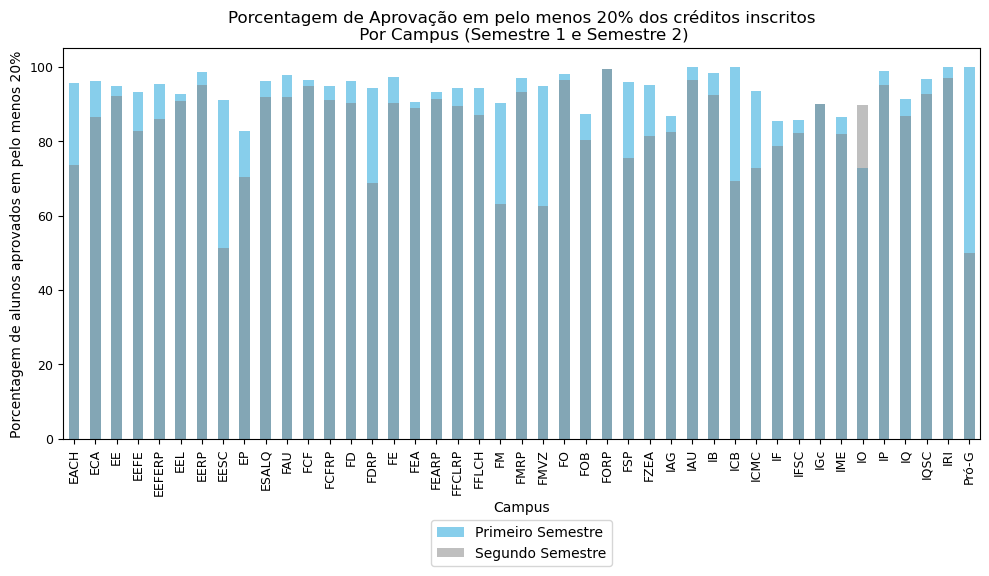

In [ ]:
aprovacao20_por_unidade_sem1.plot(kind='bar', figsize=(10, 6), color='skyblue', alpha=1, rot=90,  fontsize=9)
aprovacao20_por_unidade_sem2.plot(kind='bar', figsize=(10, 6), color='grey',alpha=0.5,  rot=90, fontsize=9)

plt.title('Porcentagem de Aprovação em pelo menos 20% dos créditos inscritos\n Por Campus (Semestre 1 e Semestre 2)')
plt.xlabel('Campus')
plt.ylabel('Porcentagem de alunos aprovados em pelo menos 20%')
plt.legend(['Primeiro Semestre', 'Segundo Semestre'], loc='upper center', bbox_to_anchor=(0.5, -0.19))

plt.tight_layout()
plt.show()

Do grafico anterior, podemos notar que apenas o Instituto de Oceonorafia apresentou % porcentagem de aprovação do segundo semestre maior que a do primeiro. Isso também pode ser decorrente de notas ainda não inseridas no sistema (provas de recuperação, conceito em aberto etc). Vamos fazer uma análise sem

### Analisando quantidade de alunos aprovados em mais de 50% das disciplinas por campus
- Verifica se cada valor x na coluna é igual a 'S' (indicando aprovação em pelo menos 50% das disciplinas), retornando um booleano True ou False.
- Em seguida, calcula a média desses booleanos. Como True é considerado como 1 e False como 0 em operações de média, a média desses booleanos representa a porcentagem de casos em que o valor é 'S'.
- Multiplica essa porcentagem por 100 para obter a porcentagem em termos percentuais.

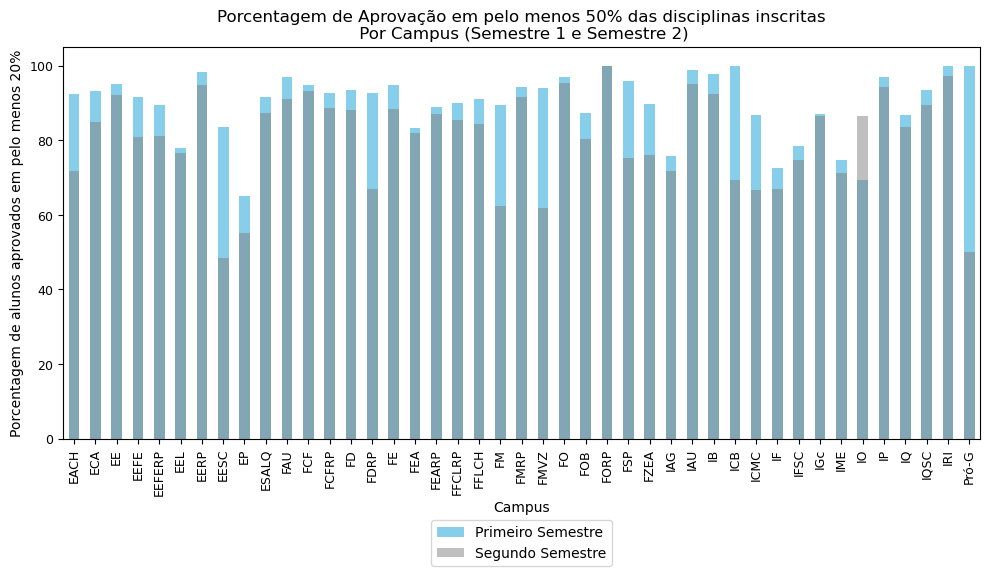

In [ ]:
aprovacao_por_unidade_sem1 = df1.groupby('Unidade')['Aprovação em ao menos 50% disciplinas'].apply(lambda x: (x == 'S').mean() * 100)
aprovacao_por_unidade_sem2 = df2.groupby('Unidade')['Aprovação em ao menos 50% disciplinas'].apply(lambda x: (x == 'S').mean() * 100)

aprovacao_por_unidade_sem1.plot(kind='bar', figsize=(10, 6), color='skyblue', alpha=1, rot=90,  fontsize=9)
aprovacao_por_unidade_sem2.plot(kind='bar', figsize=(10, 6), color='grey',alpha=0.5,  rot=90, fontsize=9)

plt.title('Porcentagem de Aprovação em pelo menos 50% das disciplinas inscritas\n Por Campus (Semestre 1 e Semestre 2)')
plt.xlabel('Campus')
plt.ylabel('Porcentagem de alunos aprovados em pelo menos 20%')
plt.legend(['Primeiro Semestre', 'Segundo Semestre'], loc='upper center', bbox_to_anchor=(0.5, -0.19))

plt.tight_layout()
plt.show()

### Análises de processamentos pendentes por frequência/notas não cadastradas

In [ ]:
df1[df1['Status do processamento'] == 'Pendente por freq/nota não cadastrada'].groupby('Unidade')['Status do processamento'].value_counts()


Unidade  Status do processamento              
EACH     Pendente por freq/nota não cadastrada     5
ECA      Pendente por freq/nota não cadastrada     3
EE       Pendente por freq/nota não cadastrada     1
EEL      Pendente por freq/nota não cadastrada     2
EERP     Pendente por freq/nota não cadastrada     1
EESC     Pendente por freq/nota não cadastrada    21
EP       Pendente por freq/nota não cadastrada    13
FAU      Pendente por freq/nota não cadastrada     1
FDRP     Pendente por freq/nota não cadastrada     7
FEA      Pendente por freq/nota não cadastrada    12
FFCLRP   Pendente por freq/nota não cadastrada     1
FFLCH    Pendente por freq/nota não cadastrada     2
FM       Pendente por freq/nota não cadastrada    28
FMRP     Pendente por freq/nota não cadastrada     6
FOB      Pendente por freq/nota não cadastrada    27
FSP      Pendente por freq/nota não cadastrada     1
FZEA     Pendente por freq/nota não cadastrada     1
IAG      Pendente por freq/nota não cadastrada     3

In [ ]:
df2[df2['Status do processamento'] == 'Pendente por freq/nota não cadastrada'].groupby('Unidade')['Status do processamento'].value_counts()


Unidade  Status do processamento              
EACH     Pendente por freq/nota não cadastrada    231
ECA      Pendente por freq/nota não cadastrada     21
EE       Pendente por freq/nota não cadastrada      1
EEFE     Pendente por freq/nota não cadastrada     11
EEFERP   Pendente por freq/nota não cadastrada      5
EEL      Pendente por freq/nota não cadastrada      7
EESC     Pendente por freq/nota não cadastrada    218
EP       Pendente por freq/nota não cadastrada     90
ESALQ    Pendente por freq/nota não cadastrada      4
FAU      Pendente por freq/nota não cadastrada      8
FCF      Pendente por freq/nota não cadastrada      3
FCFRP    Pendente por freq/nota não cadastrada      1
FD       Pendente por freq/nota não cadastrada     14
FDRP     Pendente por freq/nota não cadastrada     40
FE       Pendente por freq/nota não cadastrada      4
FEA      Pendente por freq/nota não cadastrada     11
FFCLRP   Pendente por freq/nota não cadastrada      8
FFLCH    Pendente por freq/nota não

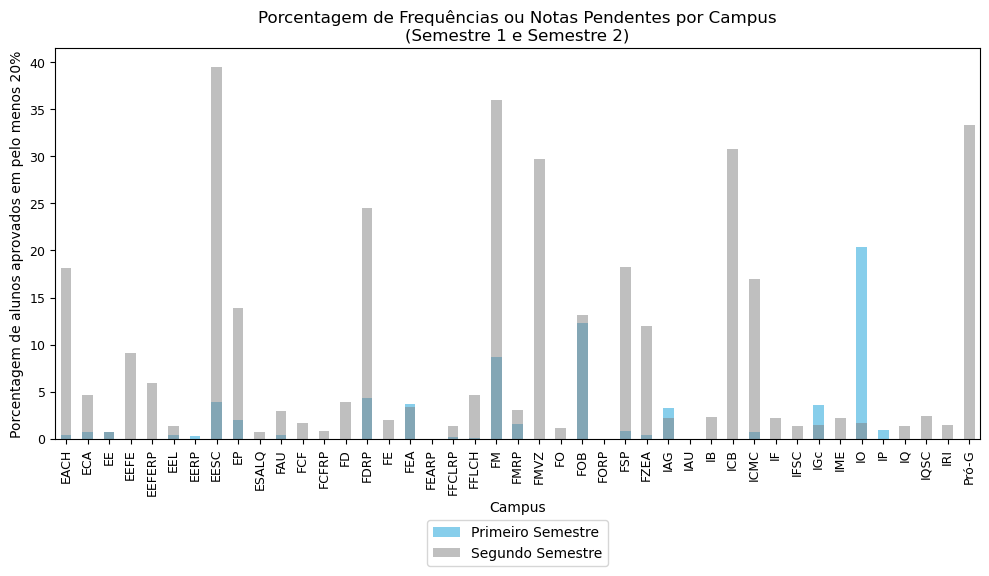

In [ ]:
pendencias_por_unidade_sem1 = df1.groupby('Unidade')['Status do processamento'].apply(lambda x: (x == 'Pendente por freq/nota não cadastrada').mean() * 100)
pendencias_por_unidade_sem2 = df2.groupby('Unidade')['Status do processamento'].apply(lambda x: (x == 'Pendente por freq/nota não cadastrada').mean() * 100)

pendencias_por_unidade_sem1.plot(kind='bar', figsize=(10, 6), color='skyblue', alpha=1, rot=90,  fontsize=9)
pendencias_por_unidade_sem2.plot(kind='bar', figsize=(10, 6), color='grey',alpha=0.5,  rot=90, fontsize=9)

plt.title('Porcentagem de Frequências ou Notas Pendentes por Campus\n(Semestre 1 e Semestre 2)')
plt.xlabel('Campus')
plt.ylabel('Porcentagem de alunos aprovados em pelo menos 20%')
plt.legend(['Primeiro Semestre', 'Segundo Semestre'], loc='upper center', bbox_to_anchor=(0.5, -0.19))

plt.tight_layout()
plt.show()

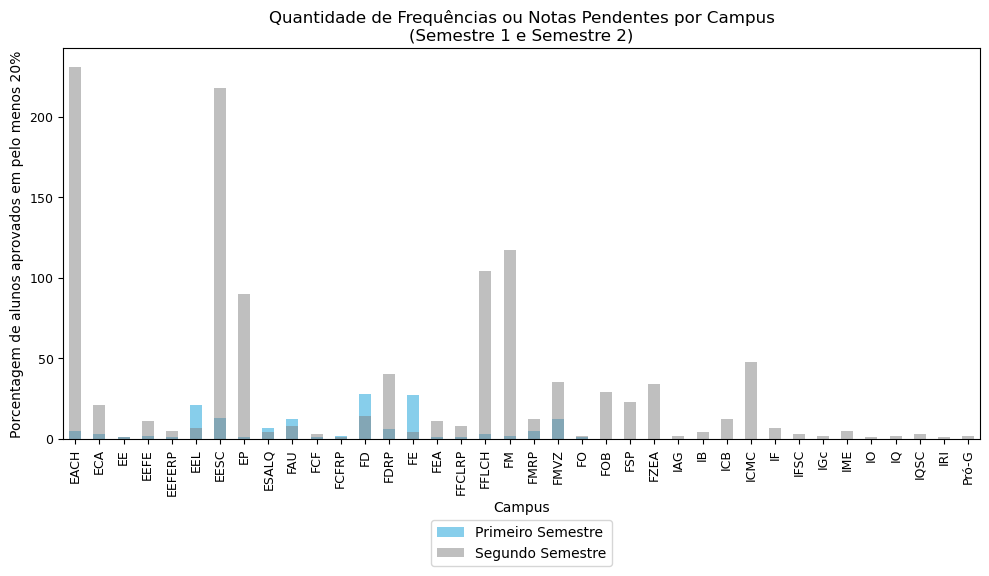

In [ ]:
freq_por_unidade_sem1 = df1[df1['Status do processamento'] == 'Pendente por freq/nota não cadastrada'].groupby('Unidade').size()
freq_por_unidade_sem2 = df2[df2['Status do processamento'] == 'Pendente por freq/nota não cadastrada'].groupby('Unidade').size()

freq_por_unidade_sem1.plot(kind='bar', figsize=(10, 6), color='skyblue', alpha=1, rot=90,  fontsize=9)
freq_por_unidade_sem2.plot(kind='bar', figsize=(10, 6), color='grey',alpha=0.5,  rot=90, fontsize=9)

plt.title('Quantidade de Frequências ou Notas Pendentes por Campus\n(Semestre 1 e Semestre 2)')
plt.xlabel('Campus')
plt.ylabel('Porcentagem de alunos aprovados em pelo menos 20%')
plt.legend(['Primeiro Semestre', 'Segundo Semestre'], loc='upper center', bbox_to_anchor=(0.5, -0.19))

plt.tight_layout()
plt.show()

### Média por Institutos

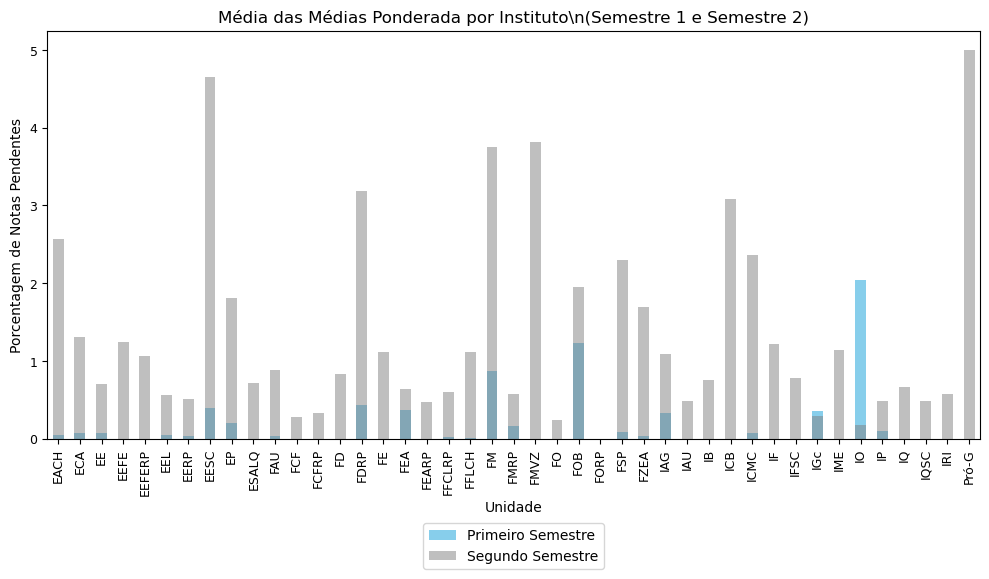

In [ ]:
ponderada_por_unidade_sem1 = df1.groupby('Unidade')['Média ponderada'].apply(lambda x: (x.isna().mean()) * 10)
ponderada_por_unidade_sem2 = df2.groupby('Unidade')['Média ponderada'].apply(lambda x: (x.isna().mean()) * 10)

ponderada_por_unidade_sem1.plot(kind='bar', figsize=(10, 6), color='skyblue', alpha=1, rot=90, fontsize=9)
ponderada_por_unidade_sem2.plot(kind='bar', figsize=(10, 6), color='grey', alpha=0.5, rot=90, fontsize=9)

plt.title('Média das Médias Ponderada por Instituto\\n(Semestre 1 e Semestre 2)')
plt.xlabel('Unidade')
plt.ylabel('Porcentagem de Notas Pendentes')
plt.legend(['Primeiro Semestre', 'Segundo Semestre'], loc='upper center', bbox_to_anchor=(0.5, -0.19))

plt.tight_layout()
plt.show()

In [ ]:
df1['Média ponderada'].unique()

array([9.071, 8.24 , 6.25 , ..., 3.772, 6.039, 3.421])

### Box plot da média ponderada por instituto

In [ ]:
biologicas = ['EERP', 'FORP', 'FMVZ', 'FMRP', 'FM', 'EE', 'FO', 'FCF', 'FCFRP', 'IB', 'FZEA', 'ICB', 'FSP', 'FOB', 'EEFERP', 'EEFE']

humanas = ['FE', 'FFLCH', 'IP', 'FFCLRP', 'FAU', 'FEARP', 'FDRP', 'FD', 'ECA', 'EACH', 'IAU', 'FEA', 'IRI']

exatas = ['IFSC', 'IQ', 'ICMC', 'IGc', 'EP', 'ESALQ', 'IF', 'EEL', 'IME', 'EESC', 'IQSC', 'IAG', 'IO']

In [ ]:
cores = ['skyblue', 'grey']

/tmp/ipykernel_11819/4161615092.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_biologicas['Semestre'] = 'Primeiro Semestre'
/tmp/ipykernel_11819/4161615092.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_biologicas['Semestre'] = 'Segundo Semestre'


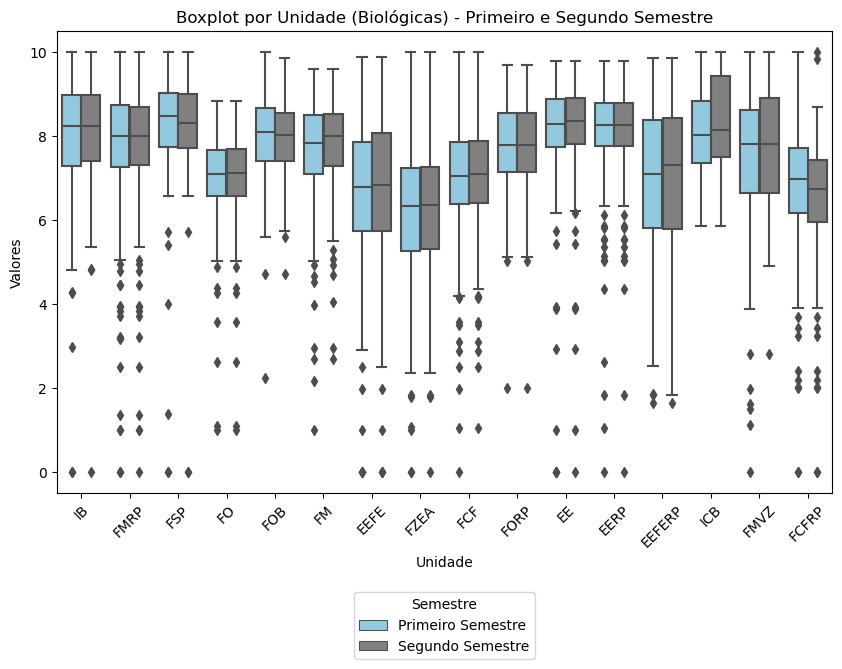

In [ ]:
# incluir apenas as unidades de biológicas
df1_biologicas = df1[df1['Unidade'].isin(biologicas)]
df2_biologicas = df2[df2['Unidade'].isin(biologicas)]

df1_biologicas['Semestre'] = 'Primeiro Semestre'
df2_biologicas['Semestre'] = 'Segundo Semestre'

df_concatenado_biologicas = pd.concat([df1_biologicas, df2_biologicas])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_concatenado_biologicas, x='Unidade', y='Média ponderada', hue='Semestre', palette=cores)
plt.title('Boxplot por Unidade (Biológicas) - Primeiro e Segundo Semestre')
plt.xlabel('Unidade')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.legend(title='Semestre', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1)
plt.show()


In [ ]:
df_concatenado_biologicas['Semestre']

9        1
10       1
13       1
24       1
40       1
        ..
13199    2
13200    2
13201    2
13217    2
13221    2
Name: Semestre, Length: 5861, dtype: int64

/tmp/ipykernel_11819/1376733577.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_humanas['Semestre'] = 'Primeiro Semestre'
/tmp/ipykernel_11819/1376733577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_humanas['Semestre'] = 'Segundo Semestre'


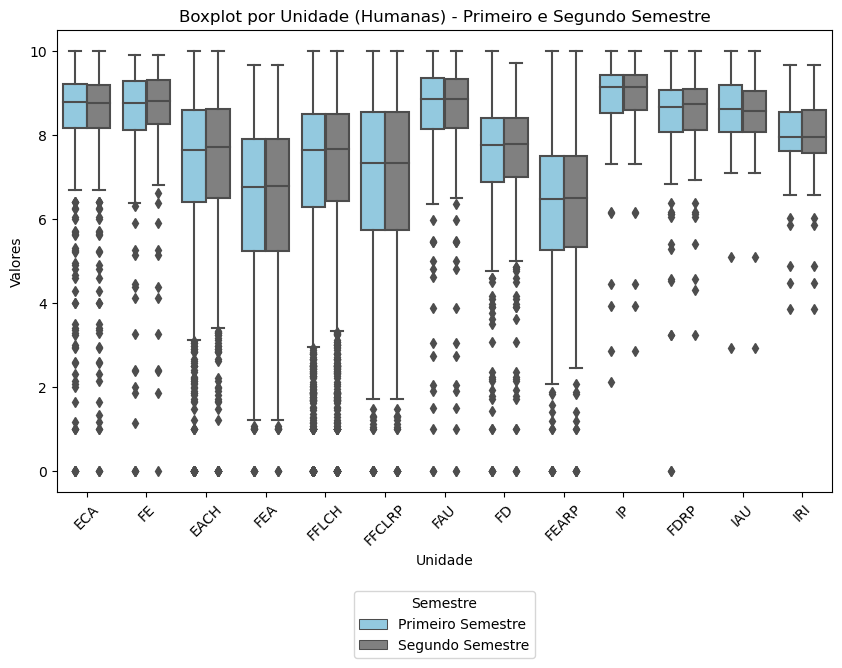

In [ ]:

df1_humanas = df1[df1['Unidade'].isin(humanas)]
df2_humanas = df2[df2['Unidade'].isin(humanas)]

df1_humanas['Semestre'] = 'Primeiro Semestre'
df2_humanas['Semestre'] = 'Segundo Semestre'

df_concatenado_humanas = pd.concat([df1_humanas, df2_humanas])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_concatenado_humanas, x='Unidade', y='Média ponderada', hue='Semestre', palette=cores)
plt.title('Boxplot por Unidade (Humanas) - Primeiro e Segundo Semestre')
plt.xlabel('Unidade')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.legend(title='Semestre', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1)
plt.show()


/tmp/ipykernel_11819/3888427600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_exatas['Semestre'] = 'Primeiro Semestre'
/tmp/ipykernel_11819/3888427600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_exatas['Semestre'] = 'Segundo Semestre'


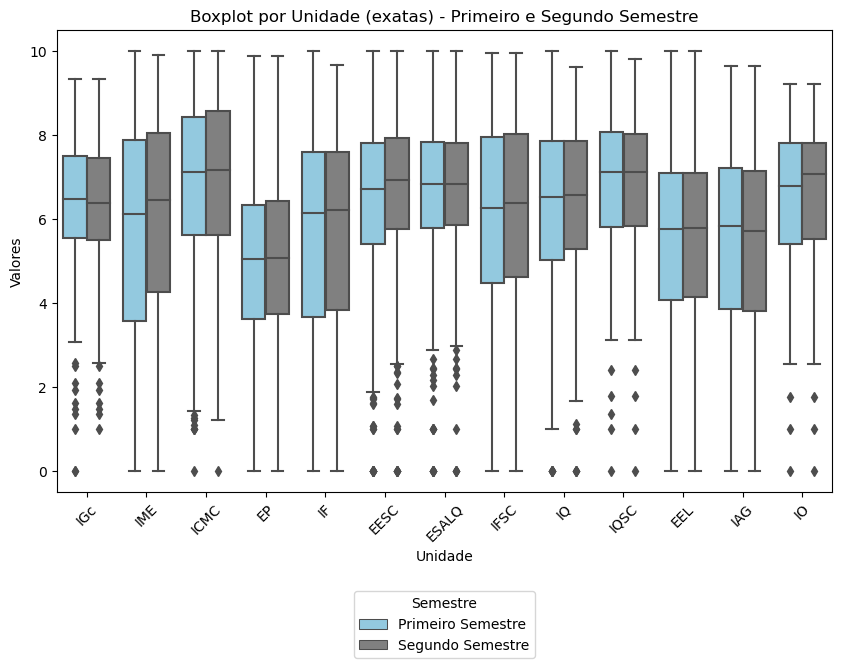

In [ ]:

df1_exatas = df1[df1['Unidade'].isin(exatas)]
df2_exatas = df2[df2['Unidade'].isin(exatas)]

df1_exatas['Semestre'] = 'Primeiro Semestre'
df2_exatas['Semestre'] = 'Segundo Semestre'
i
df_concatenado_exatas = pd.concat([df1_exatas, df2_exatas])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_concatenado_exatas, x='Unidade', y='Média ponderada', hue='Semestre', palette=cores)
plt.title('Boxplot por Unidade (exatas) - Primeiro e Segundo Semestre')
plt.xlabel('Unidade')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.legend(title='Semestre', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1)
plt.show()


## Análisando Ponderada por tipo de benefício

In [ ]:
df1['Benefício'].value_counts()

PAPFE          12798
USP Diversa      308
Name: Benefício, dtype: int64

In [ ]:
tab_unidade_beneficio = pd.crosstab(index=df1['Unidade'], columns=df1['Benefício'])
tab_unidade_beneficio


Benefício,PAPFE,USP Diversa
Unidade,,
EACH,1236,27
ECA,426,16
EE,138,2
EEFE,117,3
EEFERP,84,1
EEL,486,5
EERP,285,4
EESC,529,14
EP,609,34


### Análise da Ponderada de cada Semestre por Unidade (apena PAPFE)

/tmp/ipykernel_11819/534628753.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_biologicas['Semestre'] = 'Primeiro Semestre'
/tmp/ipykernel_11819/534628753.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_biologicas['Semestre'] = 'Segundo Semestre'


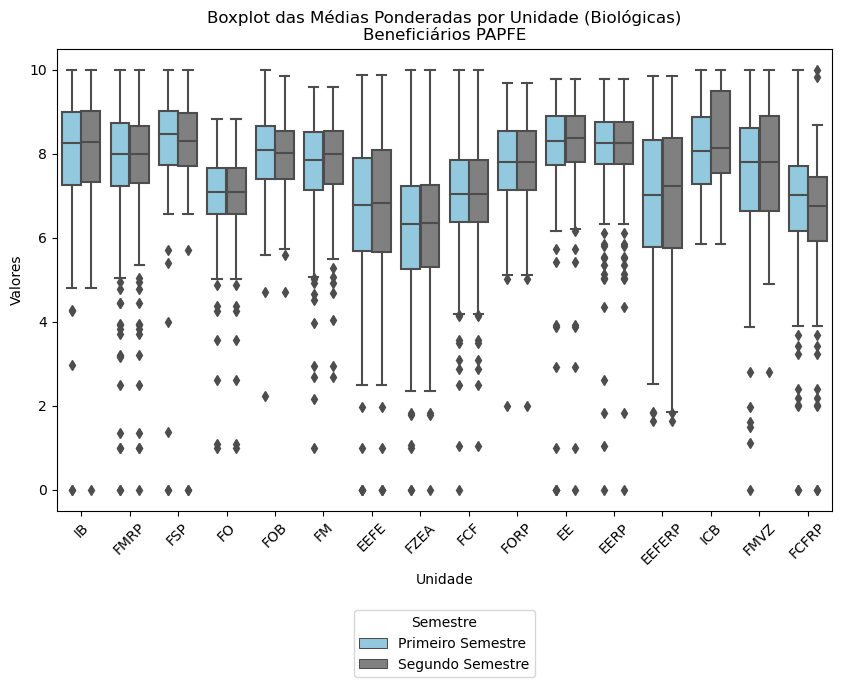

In [ ]:
df1_biologicas = df1.loc[(df1['Unidade'].isin(biologicas)) & (df1['Benefício'] == 'PAPFE')]
df2_biologicas = df2.loc[(df2['Unidade'].isin(biologicas)) & (df2['Benefício'] == 'PAPFE')]

df1_biologicas['Semestre'] = 'Primeiro Semestre'
df2_biologicas['Semestre'] = 'Segundo Semestre'

df_concatenado_biologicas = pd.concat([df1_biologicas, df2_biologicas])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_concatenado_biologicas, x='Unidade', y='Média ponderada', hue='Semestre', palette=cores)
plt.title('Boxplot das Médias Ponderadas por Unidade (Biológicas)\nBeneficiários PAPFE')
plt.xlabel('Unidade')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.legend(title='Semestre', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1)
plt.show()


/tmp/ipykernel_11819/812007588.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_humanas['Semestre'] = 'Primeiro Semestre'
/tmp/ipykernel_11819/812007588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_humanas['Semestre'] = 'Segundo Semestre'


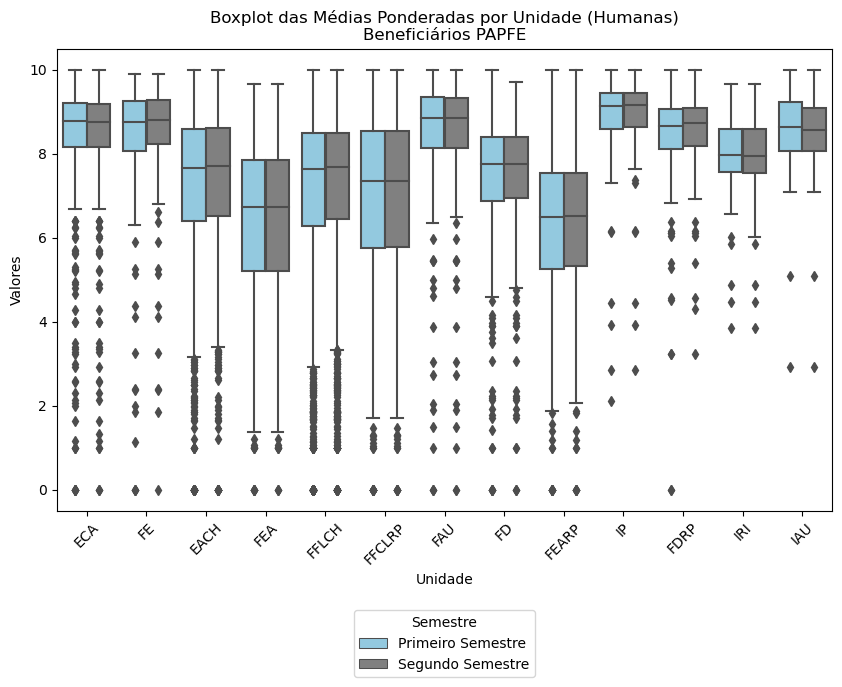

In [ ]:

df1_humanas = df1.loc[(df1['Unidade'].isin(humanas)) & (df1['Benefício'] == 'PAPFE')]
df2_humanas = df2.loc[(df2['Unidade'].isin(humanas)) & (df2['Benefício'] == 'PAPFE')]

df1_humanas['Semestre'] = 'Primeiro Semestre'
df2_humanas['Semestre'] = 'Segundo Semestre'

df_concatenado_humanas = pd.concat([df1_humanas, df2_humanas])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_concatenado_humanas, x='Unidade', y='Média ponderada', hue='Semestre', palette=cores)
plt.title('Boxplot das Médias Ponderadas por Unidade (Humanas)\nBeneficiários PAPFE')
plt.xlabel('Unidade')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.legend(title='Semestre', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1)
plt.show()


/tmp/ipykernel_11819/3927047961.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_exatas['Semestre'] = 'Primeiro Semestre'
/tmp/ipykernel_11819/3927047961.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_exatas['Semestre'] = 'Segundo Semestre'


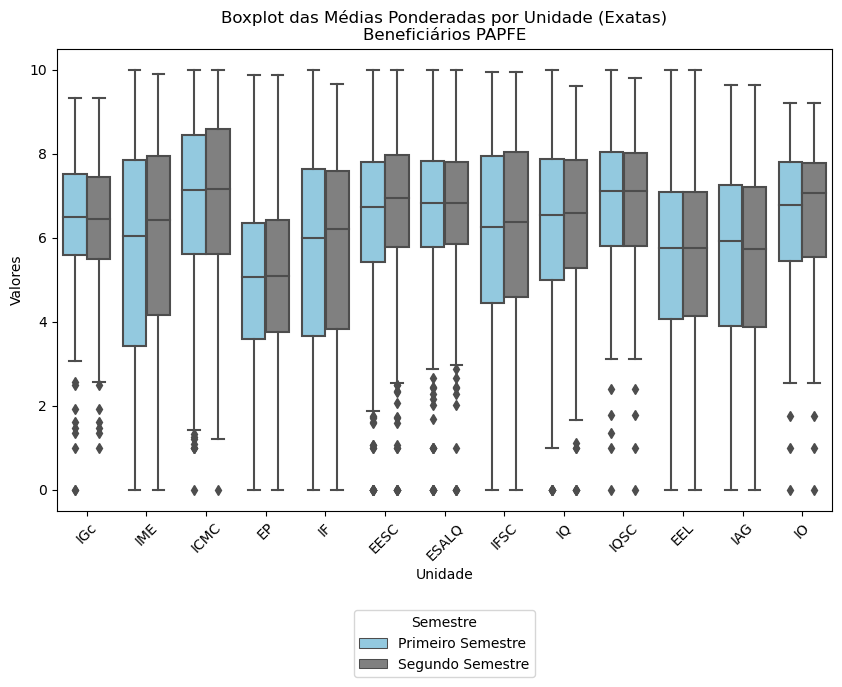

In [ ]:
df1_exatas = df1.loc[(df1['Unidade'].isin(exatas)) & (df1['Benefício'] == 'PAPFE')]
df2_exatas = df2.loc[(df2['Unidade'].isin(exatas)) & (df2['Benefício'] == 'PAPFE')]

df1_exatas['Semestre'] = 'Primeiro Semestre'
df2_exatas['Semestre'] = 'Segundo Semestre'

df_concatenado_exatas = pd.concat([df1_exatas, df2_exatas])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_concatenado_exatas, x='Unidade', y='Média ponderada', hue='Semestre', palette=cores)
plt.title('Boxplot das Médias Ponderadas por Unidade (Exatas)\nBeneficiários PAPFE')
plt.xlabel('Unidade')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.legend(title='Semestre', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1)
plt.show()


### Análises por cidade/campus

#### Em cada cidade, qual é o benefício predominante?

In [ ]:
tab = pd.crosstab(df1['Campus'], df1['Benefício'])
tab

Benefício,PAPFE,USP Diversa
Campus,,
Bauru,219,1
Lorena,486,5
Piracicaba,533,8
Pirassununga,278,4
Ribeirão Preto,2076,34
São Carlos,1220,27
São Paulo,6750,202
USP Leste,1236,27


In [ ]:
tab = pd.crosstab(df2['Campus'], df2['Benefício'])
tab

Benefício,PAPFE,USP Diversa
Campus,,
Bauru,219,1
Lorena,492,6
Piracicaba,539,8
Pirassununga,280,4
Ribeirão Preto,2070,34
São Carlos,1232,27
São Paulo,6834,202
USP Leste,1249,27


Podemos observar que o alcance do PAPFE é muito maior, como esperado, e que a USP diversa se manteve com o mesmo número de bolsas no decorrer do primeiro e segundo semestre, enquanto o PAPFE aumentaalgumas unidades por campus.

#### Analisando a ponderada em cada cidade (independente do beneficio)

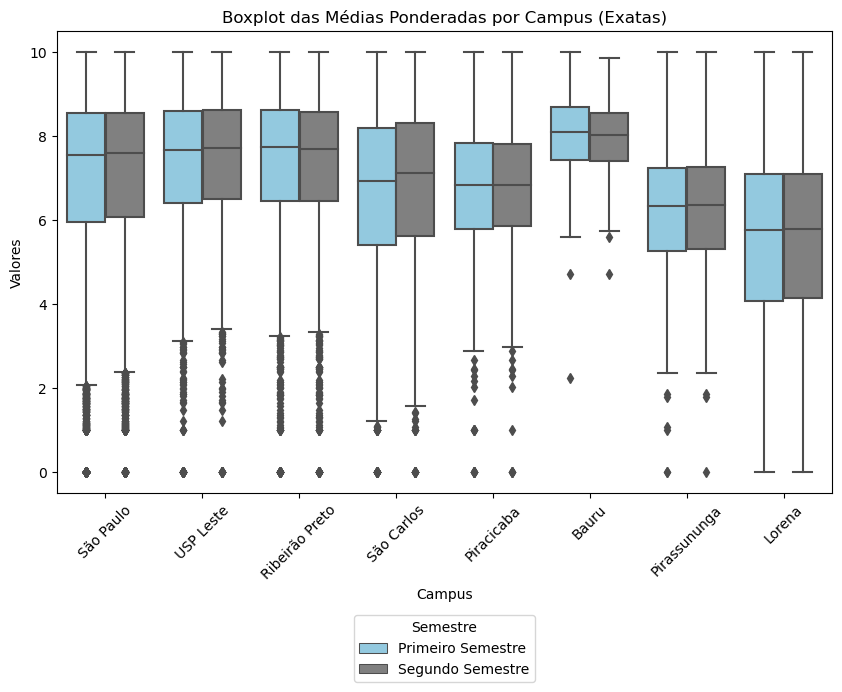

In [ ]:
df_concatenado = pd.concat([df1, df2])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_concatenado, x='Campus', y='Média ponderada', hue='Semestre', palette=cores)
plt.title('Boxplot das Médias Ponderadas por Campus (Exatas)')
plt.xlabel('Campus')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.legend(title='Semestre', loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1)
plt.show()